In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')


plt.style.use("fivethirtyeight")
%matplotlib inline

In [13]:
df = pd.read_csv(r"C:\Users\Prathiksha\Downloads\Iris.csv")
df.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [15]:
df.describe()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000

In [16]:
df.shape

(150, 6)

In [17]:
df.drop('Id',axis=1,inplace=True)
df.head()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa

In [18]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [19]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [22]:
df.drop_duplicates(inplace=True)

<AxesSubplot:xlabel='Species', ylabel='SepalLengthCm'>

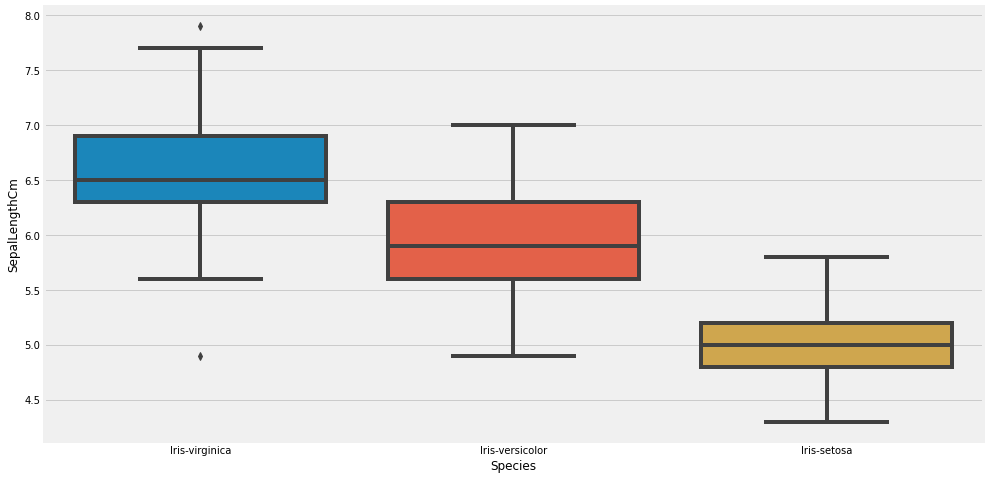

In [23]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Species',y='SepalLengthCm',data=df.sort_values('SepalLengthCm',ascending=False))

<AxesSubplot:xlabel='SepalWidthCm', ylabel='SepalLengthCm'>

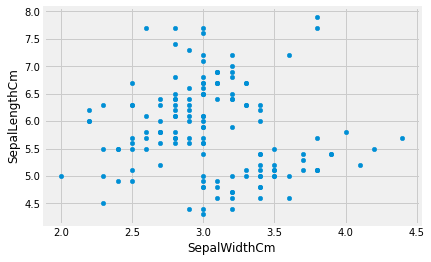

In [24]:
df.plot(kind='scatter',x='SepalWidthCm',y='SepalLengthCm')

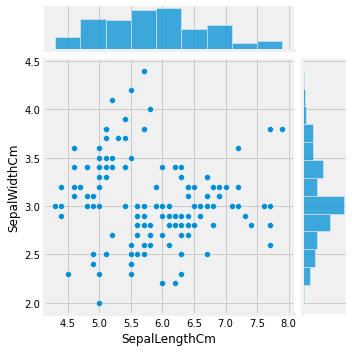

In [25]:
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=df, size=5)

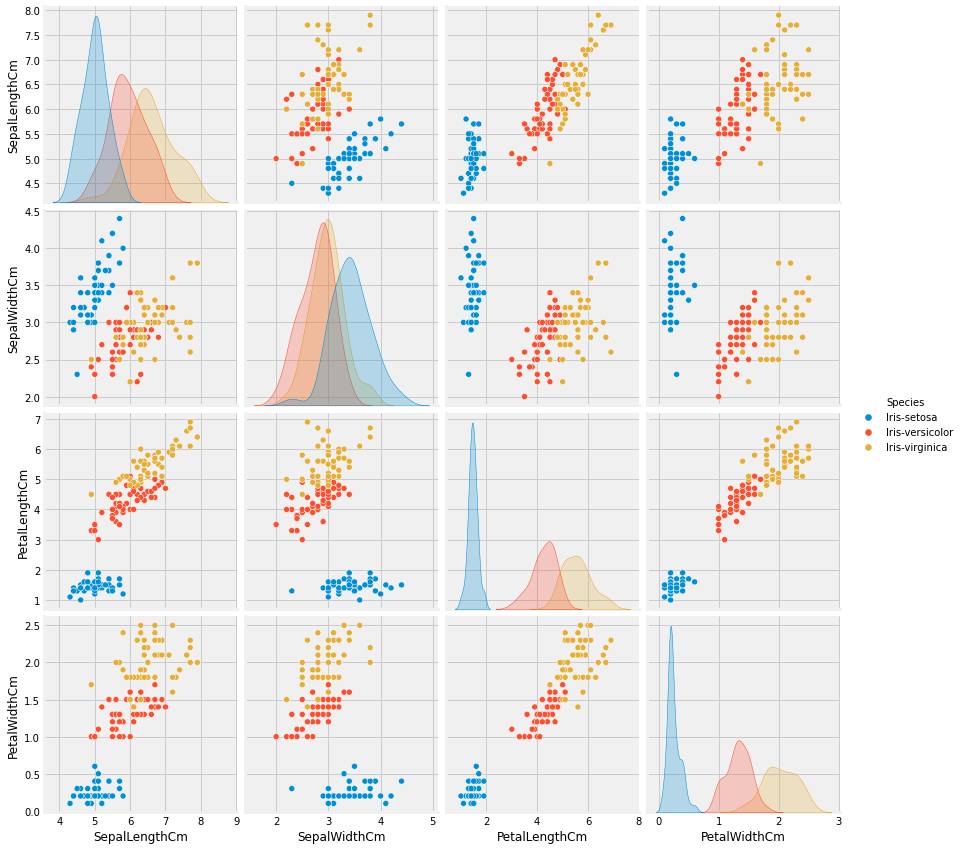

In [26]:
sns.pairplot(df, hue="Species", size=3)

array([[<AxesSubplot:title={'center':'PetalLengthCm'}, xlabel='[Species]'>,
        <AxesSubplot:title={'center':'PetalWidthCm'}, xlabel='[Species]'>],
       [<AxesSubplot:title={'center':'SepalLengthCm'}, xlabel='[Species]'>,
        <AxesSubplot:title={'center':'SepalWidthCm'}, xlabel='[Species]'>]],
      dtype=object)

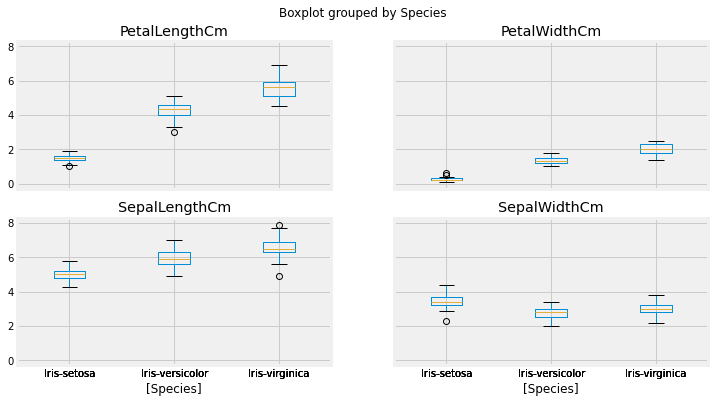

In [27]:
df.boxplot(by="Species", figsize=(12, 6))

<AxesSubplot:>

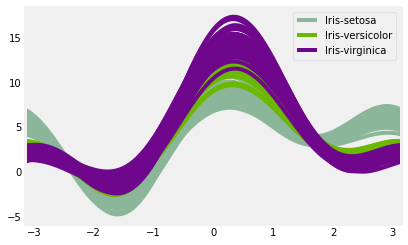

In [28]:
import pandas.plotting
from pandas.plotting import andrews_curves
andrews_curves(df, "Species")

<Figure size 1080x1080 with 0 Axes>

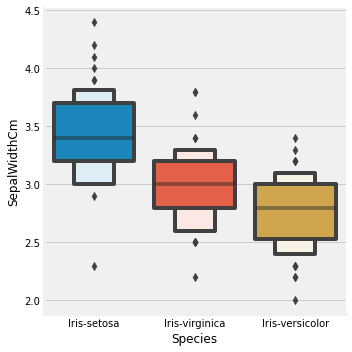

In [29]:
plt.figure(figsize=(15,15))
sns.catplot(x='Species',y='SepalWidthCm',data=df.sort_values('SepalWidthCm',ascending=False),kind='boxen')

<AxesSubplot:xlabel='Species', ylabel='SepalWidthCm'>

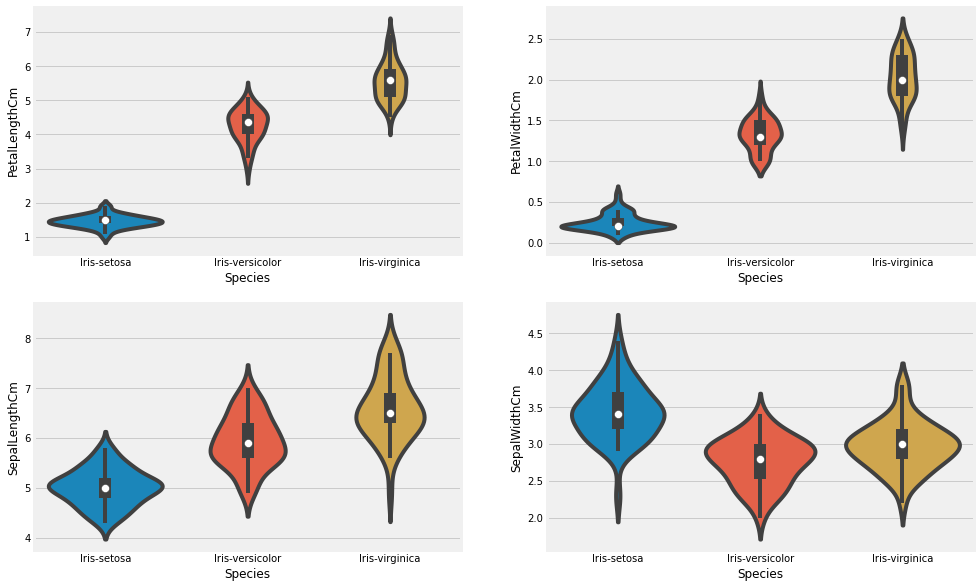

In [30]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=df)

In [31]:
X=df.drop('Species',axis=1)
y=df['Species']

In [32]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [33]:
df['Species'] = pd.Categorical(df.Species)
df['Species'] = df.Species.cat.codes
# Turn response variable into one-hot response vectory = to_categorical(df.response)
y = to_categorical(df.Species)

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,stratify=y,random_state=123)

In [35]:
model=Sequential()
model.add(Dense(100,activation='relu',input_shape=(4,)))

model.add(Dense(3,activation='softmax'))

In [36]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [37]:
history=model.fit(X_train,y_train,epochs=45,validation_data=(X_test, y_test))

Epoch 1/45
4/4 [==============================] - 1s 115ms/step - loss: 1.7278 - accuracy: 0.3235 - val_loss: 1.4876 - val_accuracy: 0.3556
Epoch 2/45
4/4 [==============================] - 0s 13ms/step - loss: 1.4089 - accuracy: 0.4118 - val_loss: 1.2496 - val_accuracy: 0.6667
Epoch 3/45
4/4 [==============================] - 0s 23ms/step - loss: 1.2000 - accuracy: 0.6667 - val_loss: 1.0585 - val_accuracy: 0.6667
Epoch 4/45
4/4 [==============================] - 0s 12ms/step - loss: 1.0224 - accuracy: 0.6667 - val_loss: 0.9146 - val_accuracy: 0.6667
Epoch 5/45
4/4 [==============================] - 0s 11ms/step - loss: 0.8963 - accuracy: 0.6667 - val_loss: 0.8422 - val_accuracy: 0.7111
Epoch 6/45
4/4 [==============================] - 0s 10ms/step - loss: 0.8434 - accuracy: 0.7549 - val_loss: 0.8105 - val_accuracy: 0.6889
Epoch 7/45
4/4 [==============================] - 0s 10ms/step - loss: 0.8130 - accuracy: 0.6765 - val_loss: 0.7885 - val_accuracy: 0.6667
Epoch 8/45
4/4 [==========

In [38]:
model.evaluate(X_test,y_test)

2/2 [==============================] - 0s 2ms/step - loss: 0.4016 - accuracy: 0.9333


[0.40157437324523926, 0.9333333373069763]

In [39]:
pred = model.predict(X_test[:10])
print(pred)

1/1 [==============================] - 0s 77ms/step
[[0.00693189 0.3320591  0.6610091 ]
 [0.00723197 0.30660725 0.6861608 ]
 [0.06838606 0.5649481  0.36666584]
 [0.04906575 0.50309896 0.44783524]
 [0.9194689  0.0599864  0.02054469]
 [0.04393928 0.5483901  0.40767068]
 [0.00647665 0.26600468 0.7275187 ]
 [0.00725313 0.28378507 0.7089618 ]
 [0.91873205 0.06141962 0.01984833]
 [0.01235352 0.41441658 0.57322997]]


In [40]:
p=np.argmax(pred,axis=1)
print(p)
print(y_test[:10])

[2 2 1 1 0 1 2 2 0 2]
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [41]:
history.history['accuracy']

[0.3235294222831726,
 0.4117647111415863,
 0.6666666865348816,
 0.6666666865348816,
 0.6666666865348816,
 0.7549019455909729,
 0.6764705777168274,
 0.6764705777168274,
 0.6764705777168274,
 0.6764705777168274,
 0.7156862616539001,
 0.8529411554336548,
 0.8235294222831726,
 0.7450980544090271,
 0.8039215803146362,
 0.8627451062202454,
 0.6764705777168274,
 0.6666666865348816,
 0.6666666865348816,
 0.843137264251709,
 0.9215686321258545,
 0.9117646813392639,
 0.813725471496582,
 0.8039215803146362,
 0.8039215803146362,
 0.813725471496582,
 0.8627451062202454,
 0.8627451062202454,
 0.8921568393707275,
 0.9117646813392639,
 0.9411764740943909,
 0.9607843160629272,
 0.9215686321258545,
 0.9411764740943909,
 0.9607843160629272,
 0.9607843160629272,
 0.9411764740943909,
 0.9117646813392639,
 0.8823529481887817,
 0.9117646813392639,
 0.9509803652763367,
 0.9607843160629272,
 0.9607843160629272,
 0.9607843160629272,
 0.9411764740943909]

In [42]:
history.history['val_accuracy']

[0.35555556416511536,
 0.6666666865348816,
 0.6666666865348816,
 0.6666666865348816,
 0.7111111283302307,
 0.6888889074325562,
 0.6666666865348816,
 0.6888889074325562,
 0.6666666865348816,
 0.6888889074325562,
 0.8222222328186035,
 0.800000011920929,
 0.6888889074325562,
 0.7777777910232544,
 0.8666666746139526,
 0.6666666865348816,
 0.6666666865348816,
 0.6666666865348816,
 0.800000011920929,
 0.9111111164093018,
 0.9111111164093018,
 0.8444444537162781,
 0.7777777910232544,
 0.7555555701255798,
 0.7777777910232544,
 0.8222222328186035,
 0.8444444537162781,
 0.8444444537162781,
 0.8888888955116272,
 0.9777777791023254,
 0.9555555582046509,
 0.9555555582046509,
 0.9333333373069763,
 0.9777777791023254,
 0.9555555582046509,
 0.9777777791023254,
 0.8888888955116272,
 0.8222222328186035,
 0.8222222328186035,
 0.9333333373069763,
 0.9777777791023254,
 0.9555555582046509,
 0.9777777791023254,
 0.9555555582046509,
 0.9333333373069763]

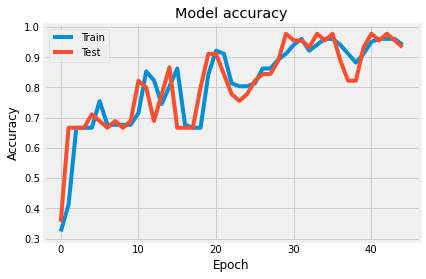

In [43]:
plt.figure()


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()